In [4]:
%autosave 180
%load_ext autoreload
%autoreload 2
%matplotlib inline

# from IPython.core.display import display, HTML,clear_output
# display(HTML("<style>.container { width:100% !important; }</style>"))

Autosaving every 180 seconds
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SEGY / SEGD -
are the standards for handling with seismic data

The key notes can be found here
 - https://agilescientific.com/blog/2014/3/26/what-is-seg-y.html
 - https://en.wikipedia.org/wiki/Open_standard
 
The presentation (in pdf format) can be found here
- http://dl.ppdm.org/dl/1007

1) The first step of real data processing is reading SGY files

There are many packages available to read SGY


- The fastest reader is SegyIO/ But it is suited for active seismic of 2D and 3D surveys (Python)

https://github.com/equinor/segyio

- C# Realization

https://github.com/jfoshee/UnpluggedSegy

- Matlab/Octave/C++ Realization 

https://github.com/cultpenguin/segymat

- some additional 

https://github.com/topics/segy

- Probably the clearest code

https://github.com/cultpenguin/segypy

https://github.com/kwinkunks/ageobot


2) It is probably better not unzip the SGY files. So, use the ZipFile

https://docs.python.org/3/library/zipfile.html

Python struct.unpack specification

https://docs.python.org/3/library/struct.html

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import sys
sys.path.append('../')
from seislab.src import segyrw
from seislab.src import plot_seismic  as ps

Using TensorFlow backend.


In [3]:
file_name = '../microseismic/data_lukoil_2012/233_stage01(1)_0003.sgy'

In [9]:
text_header = segyrw.read_textual_header(file_name)
print(text_header)

C01 InSite - SEGY File Format 1 (IEEE 32-bit floating point)                    C02 Event Time: 2016-02-25/16:12:18.753299                                      C03 SAMPLE INTERVAL UNITS = MICROSECOND                                         C04 NUMBER OF SAMPLE POINTS  2048                                               C05 SAMPLE INTERVAL, RECORD LENGTH: 250 MICROSECONDS, 512.00 MILLISECONDS       C06 TraceHdr 105-106 - Millisec value of event time stamp                       C07 TraceHdr 181-184 - P-wave arrival (microseconds)                            C08 TraceHdr 185-188 - S-wave arrival (microseconds)                            C09                                                                             C10                                                                             C11                                                                             C12                                                                             C13                                     

In [4]:
trace_descriptor = {
    'PWave':{
        'pos': 181,
        'type': 'h',
    },
    'SWave':{
        'pos': 185,
        'type': 'h',
    }
}
trace_headers = segyrw.read_trace_header(file_name, trace_descriptor=trace_descriptor)

trace_headers['PWave'] = trace_headers['PWave'][::3] 
trace_headers['SWave'] = trace_headers['SWave'][::3] 
trace_headers


{'PWave': [394, 382, 371, 362, 350, 340, 331, 329],
 'SWave': [823, 797, 760, 727, 711, 695, 681, 683]}

In [5]:
traces = segyrw.read_traces(file_name, verbose=False)

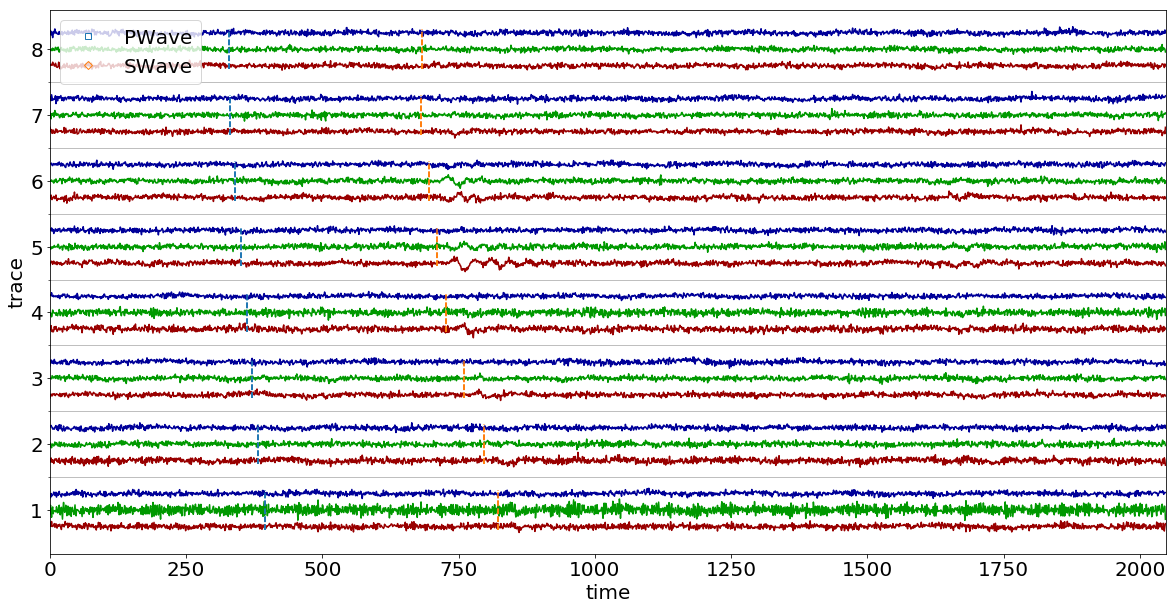

In [6]:
data = traces.reshape(8, 3, -1)
data = data.transpose((0,2,1))
ps.plot_traces(
    data,
    picks=trace_headers,
    alpha=.9, 
    dist_for_3c=1., 
    picks_curve=False,
    gain=1,
    invert_y_axis=False,
    fig_width = 20,
    picks_legend=True,
)